<a href="https://colab.research.google.com/github/JamesLeeeeeee/torchbase/blob/master/torchbase_20220203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [11]:
use_cuda= torch.cuda.is_available()
device= torch.device('cuda' if use_cuda else 'cpu')
print('selected device:', device )

selected device: cuda


In [3]:
random.seed(777)
torch.manual_seed(777)
if device== 'cuda':
  torch.cuda.manual_seed_all(777)

In [4]:
#hyperparamters
training_epochs=15
batch_size=100

In [5]:
mnist_train=dsets.MNIST(root='MNIST_data/',
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',
                       train=False,
                       transform=transforms.ToTensor(),
                       download=True
                       )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [14]:
data_loader= DataLoader(dataset=mnist_train, batch_size=batch_size,
                        shuffle=True,
                        drop_last=True)

In [15]:
linear= nn.Linear(784,10,bias=True).to(device)

In [16]:
criterion= nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(linear.parameters(), lr=0.1)

In [17]:
for epoch in range(training_epochs):
  avg_cost=0
  total_batch= len(data_loader)

  for x,y in data_loader:
    x=x.view(-1, 28*28).to(device)
    y= y.to(device)

    optimizer.zero_grad()
    hypothesis= linear(x)
    cost= criterion(hypothesis, y)
    cost.backward()
    optimizer.step()

    avg_cost+=cost/ total_batch

  print('Epoch:', '%04d' %(epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
print('')
print('Learning Finished')


Epoch: 0001 cost= 0.537392557
Epoch: 0002 cost= 0.359473705
Epoch: 0003 cost= 0.331121415
Epoch: 0004 cost= 0.316620290
Epoch: 0005 cost= 0.307045341
Epoch: 0006 cost= 0.300204128
Epoch: 0007 cost= 0.295029581
Epoch: 0008 cost= 0.290708333
Epoch: 0009 cost= 0.287379265
Epoch: 0010 cost= 0.284287512
Epoch: 0011 cost= 0.281948656
Epoch: 0012 cost= 0.279749900
Epoch: 0013 cost= 0.277890146
Epoch: 0014 cost= 0.275905132
Epoch: 0015 cost= 0.274398416

Learning Finished


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


accuracy: 0.8794999718666077
Label tensor([8], device='cuda:0')
Prediction:  8


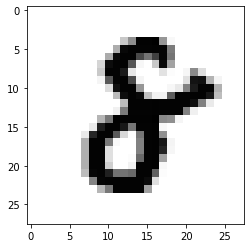

In [44]:
with torch.no_grad():
  x_test=mnist_test.test_data.view(-1, 28*28).float().to(device)
  y_test=mnist_test.test_labels.to(device)

  prediction= linear(x_test)
  correct_prediction= torch.argmax(prediction,1)==y_test
  accuracy= correct_prediction.float().mean()
  print('accuracy:', accuracy.item())

  r= random.randint(0, len(mnist_test)-1)
  x_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
  y_data=mnist_test.test_labels[r:r+1].to(device)
  
  print('Label', y_data)
  single_prediction=linear(x_data)
  print('Prediction: ', torch.argmax(single_prediction,1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()

In [45]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [46]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)